In [31]:
import pandas as pd
pd.set_option('display.float_format', '{:.5f}'.format)
import numpy as np

In [6]:
%%bash
ls -l /home/nnagarajan/github/DNNLOB-FA800/data/etf/jan2025/selected | grep -v '^d'

total 25654620
-rw-r--r--. 1 nnagarajan nnagarajan  1404487328 Oct 18 19:24 gdx_20250103_20250131.csv
-rw-r--r--. 1 nnagarajan nnagarajan   789822644 Oct 18 19:24 slv_20250103_20250131.csv
-rw-r--r--. 1 nnagarajan nnagarajan  5366864230 Oct 18 19:24 soxs-k_20250103_20250131.csv
-rw-r--r--. 1 nnagarajan nnagarajan 18709150170 Oct 18 19:24 spy_20250103_20250131.csv


In [ ]:
%%bash
cd /home/nnagarajan/github/DNNLOB-FA800/data/etf/jan2025/selected/
grep "2025-01-30" spy_20250103_20250131.csv > 01302025/spy.csv
grep "2025-01-30" slv_20250103_20250131.csv > 01302025/slv.csv
grep "2025-01-30" gdx_20250103_20250131.csv > 01302025/gdx.csv
grep "2025-01-30" soxs-k_20250103_20250131.csv > 01302025/soxs.csv

In [7]:
%%bash
cd /home/nnagarajan/github/DNNLOB-FA800/data/etf/jan2025/selected/

header=$(head -n 1 spy_20250103_20250131.csv)
for f in 01302025/spy.csv; do
    tmp=$(mktemp)
    echo "$header" > "$tmp"
    cat "$f" >> "$tmp"
    mv "$tmp" "$f"
done

header=$(head -n 1 soxs-k_20250103_20250131.csv)
for f in 01302025/soxs.csv; do
    tmp=$(mktemp)
    echo "$header" > "$tmp"
    cat "$f" >> "$tmp"
    mv "$tmp" "$f"
done

header=$(head -n 1 slv_20250103_20250131.csv)
for f in 01302025/slv.csv; do
    tmp=$(mktemp)
    echo "$header" > "$tmp"
    cat "$f" >> "$tmp"
    mv "$tmp" "$f"
done

header=$(head -n 1 gdx_20250103_20250131.csv)
for f in 01302025/gdx.csv; do
    tmp=$(mktemp)
    echo "$header" > "$tmp"
    cat "$f" >> "$tmp"
    mv "$tmp" "$f"
done

In [3]:
#df=pd.read_csv("data/etf/jan2025/selected/01302025/spy.csv",engine="pyarrow", sep = ',')
df=pd.read_csv("data/etf/jan2025/selected/slv_20250103_20250131.csv",engine="pyarrow", sep = ',')
df["Date-Time"] = df["Date-Time"].dt.tz_convert("America/New_York")
df.head(3)

,#RIC,Domain,Date-Time,Type,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,...,L23-AskPrice,L23-AskSize,L24-BidPrice,L24-BidSize,L24-AskPrice,L24-AskSize,L25-BidPrice,L25-BidSize,L25-AskPrice,L25-AskSize
0,SLV,Market Price,2025-01-03 00:10:00.512859855-05:00,Normalized LL2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SLV,Market Price,2025-01-03 07:00:00.023197243-05:00,Normalized LL2,27.13,300.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SLV,Market Price,2025-01-03 07:00:00.023197243-05:00,Normalized LL2,27.13,300.0,27.16,300.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.DataFrame(pd.to_datetime(df["Date-Time"]).dt.date.unique())

,0
0,2025-01-03
1,2025-01-06
2,2025-01-07
3,2025-01-08
4,2025-01-10
5,2025-01-13
6,2025-01-14
7,2025-01-15
8,2025-01-16
9,2025-01-17


In [5]:
df["Date"] = pd.to_datetime(df["Date-Time"]).dt.date
grouped = df.groupby("Date").size().reset_index(name="Count")


In [6]:
# Filter only regular market hours (09:30–16:00 Eastern)
df_market = df[
    (df["Date-Time"].dt.time >= pd.to_datetime("09:40:00").time()) &
    (df["Date-Time"].dt.time <= pd.to_datetime("15:50:00").time())
]

In [7]:
del df

In [8]:
base_cols = ["#RIC", "Date-Time"]
#base_cols = ["#RIC"]
# Dynamically build list for L1–L10
levels = []
for i in range(1, 11):  # L1–L10 inclusive
    levels += [
        f"L{i}-BidPrice", f"L{i}-BidSize",
        f"L{i}-AskPrice", f"L{i}-AskSize"
    ]


In [9]:
df_market_l10 = df_market[base_cols + levels]

In [10]:
del df_market

In [11]:
df_market_l10.head(10)

,#RIC,Date-Time,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,L2-AskPrice,L2-AskSize,...,L8-AskPrice,L8-AskSize,L9-BidPrice,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize
8289,SLV,2025-01-03 09:40:00.028091268-05:00,27.21,700.0,27.22,4100.0,27.20,9100.0,27.23,10700.0,...,27.29,2200.0,27.13,4900.0,27.3,800.0,27.12,5200.0,27.31,800.0
8290,SLV,2025-01-03 09:40:00.028091268-05:00,27.20,9100.0,27.22,4100.0,27.19,6700.0,27.23,10700.0,...,27.29,2200.0,27.12,5200.0,27.3,800.0,27.11,200.0,27.31,800.0
8291,SLV,2025-01-03 09:40:00.028091268-05:00,27.20,9100.0,27.22,4100.0,27.19,6400.0,27.23,10700.0,...,27.29,2200.0,27.12,5200.0,27.3,800.0,27.11,200.0,27.31,800.0
8292,SLV,2025-01-03 09:40:00.097728857-05:00,27.20,9100.0,27.22,4100.0,27.19,21200.0,27.23,10700.0,...,27.29,2200.0,27.12,5200.0,27.3,800.0,27.11,200.0,27.31,800.0
8293,SLV,2025-01-03 09:40:00.097728857-05:00,27.20,9100.0,27.22,4100.0,27.19,21200.0,27.23,10700.0,...,27.29,2200.0,27.12,5200.0,27.3,800.0,27.11,200.0,27.31,800.0
8294,SLV,2025-01-03 09:40:00.097728857-05:00,27.20,9100.0,27.22,4100.0,27.19,21200.0,27.23,10700.0,...,27.29,2200.0,27.12,5200.0,27.3,800.0,27.11,200.0,27.31,800.0
8295,SLV,2025-01-03 09:40:00.097728857-05:00,27.20,9100.0,27.22,4100.0,27.19,21200.0,27.23,10700.0,...,27.29,2200.0,27.12,5200.0,27.3,800.0,27.11,200.0,27.31,800.0
8296,SLV,2025-01-03 09:40:00.097728857-05:00,27.20,9100.0,27.22,4100.0,27.19,21200.0,27.23,10700.0,...,27.29,2200.0,27.12,5200.0,27.3,800.0,27.11,200.0,27.31,800.0
8297,SLV,2025-01-03 09:40:00.097728857-05:00,27.20,9100.0,27.22,11500.0,27.19,21200.0,27.23,10700.0,...,27.29,2200.0,27.12,5200.0,27.3,800.0,27.11,200.0,27.31,800.0
8298,SLV,2025-01-03 09:40:00.097728857-05:00,27.20,9100.0,27.22,11500.0,27.19,21200.0,27.23,25500.0,...,27.29,2200.0,27.12,5200.0,27.3,800.0,27.11,200.0,27.31,800.0


In [12]:
price_cols = df_market_l10.filter(regex=r'^L(?:10|[1-9])-(?:Bid|Ask)Price$').columns

# Keep only rows where ANY price column changed vs the previous row
changed = df_market_l10[price_cols].ne(df_market_l10[price_cols].shift()).any(axis=1)
df_filtered = df_market_l10[changed].copy()

In [13]:
print(df_filtered.size)
print(df_market_l10.size)

5222280
86063334


In [14]:
df_market_l10=df_filtered

In [15]:
df_market_l10["ms_timestamp"] = df_market_l10["Date-Time"].dt.floor("ns")
df_market_l10 = (
    df_market_l10.drop_duplicates(subset=["#RIC", "ms_timestamp"], keep="last")
      .drop(columns="ms_timestamp")
)
df_market_l10=df_market_l10.dropna()

In [16]:
df_market_l10.size

4463508

In [17]:
df_market_l10.head(10)

,#RIC,Date-Time,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,L2-AskPrice,L2-AskSize,...,L8-AskPrice,L8-AskSize,L9-BidPrice,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize
8290,SLV,2025-01-03 09:40:00.028091268-05:00,27.20,9100.0,27.22,4100.0,27.19,6700.0,27.23,10700.0,...,27.29,2200.0,27.12,5200.0,27.30,800.0,27.11,200.0,27.31,800.0
8304,SLV,2025-01-03 09:40:00.375169630-05:00,27.21,2700.0,27.22,11200.0,27.20,9100.0,27.23,25500.0,...,27.29,2200.0,27.13,4900.0,27.30,800.0,27.12,5200.0,27.31,800.0
8336,SLV,2025-01-03 09:40:05.023122125-05:00,27.21,20300.0,27.23,25500.0,27.20,9300.0,27.24,21000.0,...,27.30,800.0,27.13,4900.0,27.31,800.0,27.12,5200.0,27.32,200.0
8338,SLV,2025-01-03 09:40:05.447334991-05:00,27.21,18000.0,27.22,2600.0,27.20,9300.0,27.23,25500.0,...,27.29,2200.0,27.13,4900.0,27.30,800.0,27.12,5200.0,27.31,800.0
8355,SLV,2025-01-03 09:40:07.162635990-05:00,27.21,23900.0,27.23,25500.0,27.20,9300.0,27.24,21000.0,...,27.30,800.0,27.13,4900.0,27.31,800.0,27.12,5200.0,27.32,200.0
8359,SLV,2025-01-03 09:40:07.382657101-05:00,27.21,21500.0,27.22,2700.0,27.20,9300.0,27.23,25500.0,...,27.29,2200.0,27.13,4900.0,27.30,800.0,27.12,5200.0,27.31,800.0
8362,SLV,2025-01-03 09:40:07.617733064-05:00,27.21,21500.0,27.23,25500.0,27.20,9300.0,27.24,21000.0,...,27.30,800.0,27.13,4900.0,27.31,800.0,27.12,5200.0,27.32,200.0
8363,SLV,2025-01-03 09:40:07.758153713-05:00,27.21,21500.0,27.22,2500.0,27.20,9300.0,27.23,25500.0,...,27.29,2200.0,27.13,4900.0,27.30,800.0,27.12,5200.0,27.31,800.0
8405,SLV,2025-01-03 09:40:13.487973259-05:00,27.20,9100.0,27.22,23300.0,27.19,21200.0,27.23,25700.0,...,27.29,2200.0,27.12,5400.0,27.30,1000.0,27.11,200.0,27.31,800.0
8447,SLV,2025-01-03 09:40:15.927467988-05:00,27.20,9100.0,27.21,2900.0,27.19,21200.0,27.22,23300.0,...,27.28,1000.0,27.12,5400.0,27.29,2200.0,27.11,200.0,27.30,1000.0


In [18]:
#df_market_l10.drop("mid_price",axis=1, inplace=True)
#df_market_l10.drop("abs.spread",axis=1, inplace=True)
#df_market_l10.drop("rel.spread",axis=1, inplace=True)

In [19]:
df_market_l10.insert(
            2, "mid_price", (df_market_l10["L1-BidPrice"] + df_market_l10["L1-AskPrice"]) / 2
        )  # Add the mid-price column to the orderbook dataframe.
#df_market_l10.mid_price = df_market_l10.mid_price.astype(int)

In [20]:
df_market_l10.insert(
            2, "abs.spread", (df_market_l10["L1-AskPrice"] - df_market_l10["L1-BidPrice"])
        )
df_market_l10.insert(
            2, "rel.spread", (df_market_l10["L1-AskPrice"] - df_market_l10["L1-BidPrice"])/df_market_l10["mid_price"]
        )

In [21]:
df_market_l10.head(10)

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L8-AskPrice,L8-AskSize,L9-BidPrice,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize
8290,SLV,2025-01-03 09:40:00.028091268-05:00,0.000735,0.02,27.210,27.20,9100.0,27.22,4100.0,27.19,...,27.29,2200.0,27.12,5200.0,27.30,800.0,27.11,200.0,27.31,800.0
8304,SLV,2025-01-03 09:40:00.375169630-05:00,0.000367,0.01,27.215,27.21,2700.0,27.22,11200.0,27.20,...,27.29,2200.0,27.13,4900.0,27.30,800.0,27.12,5200.0,27.31,800.0
8336,SLV,2025-01-03 09:40:05.023122125-05:00,0.000735,0.02,27.220,27.21,20300.0,27.23,25500.0,27.20,...,27.30,800.0,27.13,4900.0,27.31,800.0,27.12,5200.0,27.32,200.0
8338,SLV,2025-01-03 09:40:05.447334991-05:00,0.000367,0.01,27.215,27.21,18000.0,27.22,2600.0,27.20,...,27.29,2200.0,27.13,4900.0,27.30,800.0,27.12,5200.0,27.31,800.0
8355,SLV,2025-01-03 09:40:07.162635990-05:00,0.000735,0.02,27.220,27.21,23900.0,27.23,25500.0,27.20,...,27.30,800.0,27.13,4900.0,27.31,800.0,27.12,5200.0,27.32,200.0
8359,SLV,2025-01-03 09:40:07.382657101-05:00,0.000367,0.01,27.215,27.21,21500.0,27.22,2700.0,27.20,...,27.29,2200.0,27.13,4900.0,27.30,800.0,27.12,5200.0,27.31,800.0
8362,SLV,2025-01-03 09:40:07.617733064-05:00,0.000735,0.02,27.220,27.21,21500.0,27.23,25500.0,27.20,...,27.30,800.0,27.13,4900.0,27.31,800.0,27.12,5200.0,27.32,200.0
8363,SLV,2025-01-03 09:40:07.758153713-05:00,0.000367,0.01,27.215,27.21,21500.0,27.22,2500.0,27.20,...,27.29,2200.0,27.13,4900.0,27.30,800.0,27.12,5200.0,27.31,800.0
8405,SLV,2025-01-03 09:40:13.487973259-05:00,0.000735,0.02,27.210,27.20,9100.0,27.22,23300.0,27.19,...,27.29,2200.0,27.12,5400.0,27.30,1000.0,27.11,200.0,27.31,800.0
8447,SLV,2025-01-03 09:40:15.927467988-05:00,0.000368,0.01,27.205,27.20,9100.0,27.21,2900.0,27.19,...,27.28,1000.0,27.12,5400.0,27.29,2200.0,27.11,200.0,27.30,1000.0


In [22]:
print(sum(round(df_market_l10["abs.spread"],2)==float(0.01)))
tick_size=sum(round(df_market_l10["abs.spread"],2)==float(0.01))/df_market_l10.size
print(tick_size)

58887
0.01231345390217739


In [26]:
horizons=(10,50,100)
rolling_mid = df_market_l10["mid_price"]
rolling_mid = rolling_mid.to_numpy().flatten()
for h in horizons:
        delta_ticks = (rolling_mid[h:] - df_market_l10["mid_price"][:-h])
        df_market_l10[f"Raw_Target_{str(h)}"] = delta_ticks

In [27]:
df_market_l10.head(10)

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100
8290,SLV,2025-01-03 09:40:00.028091268-05:00,0.000735,0.02,27.210,27.20,9100.0,27.22,4100.0,27.19,...,5200.0,27.30,800.0,27.11,200.0,27.31,800.0,0.00,0.010,0.010
8304,SLV,2025-01-03 09:40:00.375169630-05:00,0.000367,0.01,27.215,27.21,2700.0,27.22,11200.0,27.20,...,4900.0,27.30,800.0,27.12,5200.0,27.31,800.0,0.00,0.010,0.000
8336,SLV,2025-01-03 09:40:05.023122125-05:00,0.000735,0.02,27.220,27.21,20300.0,27.23,25500.0,27.20,...,4900.0,27.31,800.0,27.12,5200.0,27.32,200.0,0.00,-0.005,0.005
8338,SLV,2025-01-03 09:40:05.447334991-05:00,0.000367,0.01,27.215,27.21,18000.0,27.22,2600.0,27.20,...,4900.0,27.30,800.0,27.12,5200.0,27.31,800.0,0.00,0.010,0.005
8355,SLV,2025-01-03 09:40:07.162635990-05:00,0.000735,0.02,27.220,27.21,23900.0,27.23,25500.0,27.20,...,4900.0,27.31,800.0,27.12,5200.0,27.32,200.0,-0.01,-0.005,-0.005
8359,SLV,2025-01-03 09:40:07.382657101-05:00,0.000367,0.01,27.215,27.21,21500.0,27.22,2700.0,27.20,...,4900.0,27.30,800.0,27.12,5200.0,27.31,800.0,-0.01,0.000,0.005
8362,SLV,2025-01-03 09:40:07.617733064-05:00,0.000735,0.02,27.220,27.21,21500.0,27.23,25500.0,27.20,...,4900.0,27.31,800.0,27.12,5200.0,27.32,200.0,-0.01,0.000,0.000
8363,SLV,2025-01-03 09:40:07.758153713-05:00,0.000367,0.01,27.215,27.21,21500.0,27.22,2500.0,27.20,...,4900.0,27.30,800.0,27.12,5200.0,27.31,800.0,0.00,0.010,0.000
8405,SLV,2025-01-03 09:40:13.487973259-05:00,0.000735,0.02,27.210,27.20,9100.0,27.22,23300.0,27.19,...,5400.0,27.30,1000.0,27.11,200.0,27.31,800.0,0.01,0.010,0.010
8447,SLV,2025-01-03 09:40:15.927467988-05:00,0.000368,0.01,27.205,27.20,9100.0,27.21,2900.0,27.19,...,5400.0,27.29,2200.0,27.11,200.0,27.30,1000.0,0.01,0.020,0.010


In [28]:
df_market_l10.describe()

,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,L2-AskPrice,...,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100
count,106274.000000,106274.000000,106274.000000,106274.000000,106274.000000,106274.000000,106274.000000,106274.000000,106274.000000,106274.000000,...,106274.000000,106274.000000,106274.000000,106274.000000,106274.000000,106274.000000,106274.000000,106264.000000,106224.000000,106174.000000
mean,0.000566,0.015704,27.774356,27.766504,5464.930237,27.782208,5548.756846,27.756393,6641.113546,27.792760,...,1232.837411,27.867680,1161.297166,27.673771,886.552271,27.879311,854.814442,0.000118,0.000588,0.001160
std,0.001045,0.029086,0.483273,0.483485,4667.498838,0.483498,4804.220266,0.483538,4375.245587,0.483862,...,1467.671935,0.490824,1344.232705,0.486747,1174.997500,0.495434,1133.626251,0.024793,0.046955,0.064002
min,0.000346,0.010000,26.870000,26.800000,1.000000,26.880000,1.000000,26.540000,5.000000,26.890000,...,20.000000,26.960000,20.000000,19.800000,11.000000,26.970000,20.000000,-0.655000,-0.660000,-0.675000
25%,0.000360,0.010000,27.430000,27.420000,1700.000000,27.440000,1700.000000,27.410000,2700.000000,27.450000,...,600.000000,27.520000,500.000000,27.330000,300.000000,27.530000,300.000000,-0.005000,-0.015000,-0.025000
50%,0.000368,0.010000,27.695000,27.690000,4100.000000,27.700000,4100.000000,27.680000,7100.000000,27.710000,...,900.000000,27.790000,900.000000,27.590000,600.000000,27.800000,600.000000,0.000000,0.000000,0.000000
75%,0.000721,0.020000,28.020000,28.010000,8500.000000,28.030000,8500.000000,28.000000,9100.000000,28.040000,...,1200.000000,28.110000,1200.000000,27.920000,1000.000000,28.130000,1000.000000,0.010000,0.020000,0.025000
max,0.035436,1.000000,28.895000,28.890000,108700.000000,28.900000,35400.000000,28.880000,105400.000000,28.910000,...,15600.000000,31.820000,12100.000000,28.800000,10300.000000,35.750000,11400.000000,0.650000,0.690000,0.695000


In [29]:
#df = df_market_l10.set_index("Date-Time",drop=True,inplace=True)

In [32]:
theta=0.01
df_market_l10["Target_10"] = np.where(df_market_l10["Raw_Target_10"] > theta, 2, np.where(df_market_l10["Raw_Target_10"] < -theta, 1,0))
df_market_l10["Target_50"] = np.where(df_market_l10["Raw_Target_50"] > theta, 2, np.where(df_market_l10["Raw_Target_50"] < -theta, 1,0))
df_market_l10["Target_100"] = np.where(df_market_l10["Raw_Target_100"] > theta, 2, np.where(df_market_l10["Raw_Target_100"] < -theta, 1,0))

In [87]:
#df_market_l10.to_csv("data/etf/jan2025/selected/l10/soxs_l10.csv",index=False)

In [33]:
# Convert Series to DataFrame
class_summary = df_market_l10.groupby("Target_100").size().reset_index(name="Count")

# Calculate relative percentage
class_summary["Percent"] = (class_summary["Count"] / class_summary["Count"].sum()) * 100
class_summary["Percent"] = class_summary["Percent"].round(2)

print(class_summary)

   Target_100  Count  Percent
0           0  23270 21.90000
1           1  40368 37.98000
2           2  42636 40.12000


In [34]:
df_market_l10

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
8290,SLV,2025-01-03 09:40:00.028091268-05:00,0.00074,0.02000,27.21000,27.20000,9100.00000,27.22000,4100.00000,27.19000,...,27.11000,200.00000,27.31000,800.00000,0.00000,0.01000,0.01000,0,0,0
8304,SLV,2025-01-03 09:40:00.375169630-05:00,0.00037,0.01000,27.21500,27.21000,2700.00000,27.22000,11200.00000,27.20000,...,27.12000,5200.00000,27.31000,800.00000,0.00000,0.01000,0.00000,0,2,0
8336,SLV,2025-01-03 09:40:05.023122125-05:00,0.00073,0.02000,27.22000,27.21000,20300.00000,27.23000,25500.00000,27.20000,...,27.12000,5200.00000,27.32000,200.00000,0.00000,-0.00500,0.00500,0,0,0
8338,SLV,2025-01-03 09:40:05.447334991-05:00,0.00037,0.01000,27.21500,27.21000,18000.00000,27.22000,2600.00000,27.20000,...,27.12000,5200.00000,27.31000,800.00000,0.00000,0.01000,0.00500,0,2,0
8355,SLV,2025-01-03 09:40:07.162635990-05:00,0.00073,0.02000,27.22000,27.21000,23900.00000,27.23000,25500.00000,27.20000,...,27.12000,5200.00000,27.32000,200.00000,-0.01000,-0.00500,-0.00500,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362907,SLV,2025-01-31 15:49:45.092637185-05:00,0.00035,0.01000,28.46500,28.46000,11700.00000,28.47000,2200.00000,28.45000,...,28.37000,800.00000,28.56000,1400.00000,NaN,NaN,NaN,0,0,0
2362909,SLV,2025-01-31 15:49:45.312371136-05:00,0.00070,0.02000,28.47000,28.46000,10700.00000,28.48000,3900.00000,28.45000,...,28.37000,800.00000,28.57000,500.00000,NaN,NaN,NaN,0,0,0
2362911,SLV,2025-01-31 15:49:45.842410992-05:00,0.00035,0.01000,28.46500,28.46000,10300.00000,28.47000,2200.00000,28.45000,...,28.37000,800.00000,28.56000,1400.00000,NaN,NaN,NaN,0,0,0
2362919,SLV,2025-01-31 15:49:47.317805556-05:00,0.00070,0.02000,28.47000,28.46000,8500.00000,28.48000,3900.00000,28.45000,...,28.37000,800.00000,28.57000,500.00000,NaN,NaN,NaN,0,0,0


In [35]:
# z-score normalization
df_market_l10[levels]

,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,L2-AskPrice,L2-AskSize,L3-BidPrice,L3-BidSize,...,L8-AskPrice,L8-AskSize,L9-BidPrice,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize
8290,27.20000,9100.00000,27.22000,4100.00000,27.19000,6700.00000,27.23000,10700.00000,27.18000,9800.00000,...,27.29000,2200.00000,27.12000,5200.00000,27.30000,800.00000,27.11000,200.00000,27.31000,800.00000
8304,27.21000,2700.00000,27.22000,11200.00000,27.20000,9100.00000,27.23000,25500.00000,27.19000,21500.00000,...,27.29000,2200.00000,27.13000,4900.00000,27.30000,800.00000,27.12000,5200.00000,27.31000,800.00000
8336,27.21000,20300.00000,27.23000,25500.00000,27.20000,9300.00000,27.24000,21000.00000,27.19000,21500.00000,...,27.30000,800.00000,27.13000,4900.00000,27.31000,800.00000,27.12000,5200.00000,27.32000,200.00000
8338,27.21000,18000.00000,27.22000,2600.00000,27.20000,9300.00000,27.23000,25500.00000,27.19000,21500.00000,...,27.29000,2200.00000,27.13000,4900.00000,27.30000,800.00000,27.12000,5200.00000,27.31000,800.00000
8355,27.21000,23900.00000,27.23000,25500.00000,27.20000,9300.00000,27.24000,21000.00000,27.19000,21500.00000,...,27.30000,800.00000,27.13000,4900.00000,27.31000,800.00000,27.12000,5200.00000,27.32000,200.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362907,28.46000,11700.00000,28.47000,2200.00000,28.45000,9600.00000,28.48000,3900.00000,28.44000,9000.00000,...,28.54000,5800.00000,28.38000,1250.00000,28.55000,1400.00000,28.37000,800.00000,28.56000,1400.00000
2362909,28.46000,10700.00000,28.48000,3900.00000,28.45000,9600.00000,28.49000,9200.00000,28.44000,9000.00000,...,28.55000,1400.00000,28.38000,1250.00000,28.56000,1400.00000,28.37000,800.00000,28.57000,500.00000
2362911,28.46000,10300.00000,28.47000,2200.00000,28.45000,9600.00000,28.48000,3900.00000,28.44000,9000.00000,...,28.54000,5800.00000,28.38000,1250.00000,28.55000,1400.00000,28.37000,800.00000,28.56000,1400.00000
2362919,28.46000,8500.00000,28.48000,3900.00000,28.45000,9600.00000,28.49000,9200.00000,28.44000,9000.00000,...,28.55000,1400.00000,28.38000,1250.00000,28.56000,1400.00000,28.37000,800.00000,28.57000,500.00000


In [36]:
from scipy.stats import zscore

In [37]:
df_market_l10[~df_market_l10.isna().any(axis=1)]

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
8290,SLV,2025-01-03 09:40:00.028091268-05:00,0.00074,0.02000,27.21000,27.20000,9100.00000,27.22000,4100.00000,27.19000,...,27.11000,200.00000,27.31000,800.00000,0.00000,0.01000,0.01000,0,0,0
8304,SLV,2025-01-03 09:40:00.375169630-05:00,0.00037,0.01000,27.21500,27.21000,2700.00000,27.22000,11200.00000,27.20000,...,27.12000,5200.00000,27.31000,800.00000,0.00000,0.01000,0.00000,0,2,0
8336,SLV,2025-01-03 09:40:05.023122125-05:00,0.00073,0.02000,27.22000,27.21000,20300.00000,27.23000,25500.00000,27.20000,...,27.12000,5200.00000,27.32000,200.00000,0.00000,-0.00500,0.00500,0,0,0
8338,SLV,2025-01-03 09:40:05.447334991-05:00,0.00037,0.01000,27.21500,27.21000,18000.00000,27.22000,2600.00000,27.20000,...,27.12000,5200.00000,27.31000,800.00000,0.00000,0.01000,0.00500,0,2,0
8355,SLV,2025-01-03 09:40:07.162635990-05:00,0.00073,0.02000,27.22000,27.21000,23900.00000,27.23000,25500.00000,27.20000,...,27.12000,5200.00000,27.32000,200.00000,-0.01000,-0.00500,-0.00500,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360157,SLV,2025-01-31 15:35:23.587710078-05:00,0.00035,0.01000,28.42500,28.42000,3605.00000,28.43000,9300.00000,28.41000,...,28.33000,2400.00000,28.52000,400.00000,0.02500,0.01500,0.04000,2,2,2
2360263,SLV,2025-01-31 15:36:03.037490790-05:00,0.00070,0.02000,28.43000,28.42000,11800.00000,28.44000,9400.00000,28.41000,...,28.33000,600.00000,28.53000,100.00000,0.01500,0.00500,0.04000,2,0,2
2360265,SLV,2025-01-31 15:36:03.707504164-05:00,0.00035,0.01000,28.42500,28.42000,11800.00000,28.43000,1800.00000,28.41000,...,28.33000,600.00000,28.52000,1200.00000,0.02500,0.01500,0.04000,2,2,2
2360268,SLV,2025-01-31 15:36:04.472256257-05:00,0.00035,0.01000,28.43500,28.43000,2900.00000,28.44000,3900.00000,28.42000,...,28.34000,1200.00000,28.53000,100.00000,0.02000,0.01000,0.03500,2,0,2


/tmp/ipykernel_525107/1027787305.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download("^VIX", start="2025-01-01", progress=False)


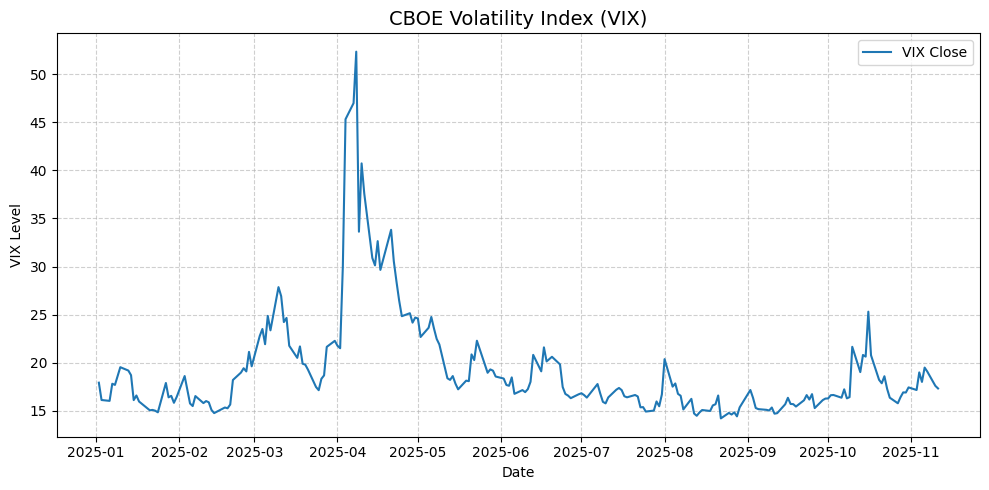

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download VIX data (symbol: ^VIX)
vix = yf.download("^VIX", start="2025-01-01", progress=False)

# Inspect columns
# print(vix.head())

# Plot the closing price
plt.figure(figsize=(10, 5))
plt.plot(vix.index, vix["Close"], label="VIX Close", linewidth=1.5)
plt.title("CBOE Volatility Index (VIX)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [303]:
!pip install pandas_market_calendars


  Using cached pandas_market_calendars-5.1.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached korean_lunar_calendar-0.3.1-py3-none-any.whl.metadata (2.8 kB)
Using cached pandas_market_calendars-5.1.1-py3-none-any.whl (127 kB)
Using cached korean_lunar_calendar-0.3.1-py3-none-any.whl (9.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [pandas_market_calendars]ge-calendars]


In [318]:
import pandas_market_calendars as mcal

nyse = mcal.get_calendar('NYSE')
#schedule = nyse.schedule(start_date='2025-01-13', end_date='2025-02-01')
trading_days = nyse.valid_days(start_date='2025-02-05', end_date='2025-02-09')

print("Number of NYSE trading days:", len(trading_days))
#print("Number of NYSE trading days:", schedule)


Number of NYSE trading days: 3


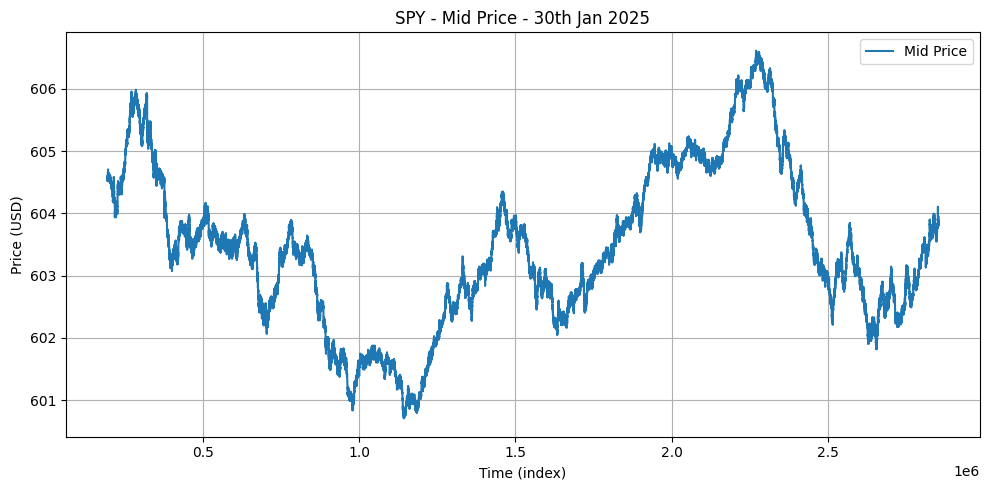

In [358]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
plt.figure(figsize=(10, 5))

plt.plot(df_market_l10['mid_price'], label='Mid Price')
#plt.plot(df_market_l10['L1-BidPrice'], label='L1 Bid Price')
#plt.plot(df_market_l10['L1-AskPrice'], label='L1 Ask Price')

plt.title('SPY - Mid Price - 30th Jan 2025')
plt.xlabel('Time (index)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [38]:
df_market_l10[~df_market_l10.isna().any(axis=1)].to_csv("data/etf/jan2025/cleaned/slv_cleaned_jan2025.csv", index=False)